<a href="https://colab.research.google.com/github/Mizwar05/mizwar1535/blob/main/projek_akhir_analisis_data_mizwar_sahid_hidayat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Nama dataset
- Nama:mizwar sahid hidayat
- Email:mizwarsh1535@gmail.com
- Id Dicoding:mizwar1535

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 kapankah tahun dengan kondisi udara yang bagus?
- pertanyaan 2 apakah ada hubungan antara suhu udara dengan beberapa senyawa polutan?

## Menyaipkan semua library yang dibuthkan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
dataku = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv')
dataku.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data

In [5]:
dataku.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [6]:
dataku.duplicated().sum()

0

In [7]:
dataku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


### Cleaning Data

saya menggunkan metode

In [8]:
dataku = dataku.rename(columns={'PM2.5': 'PM2'})

In [9]:
dataku.dropna(axis=0, inplace=True)

In [10]:
dataku.PM2.fillna(value=dataku.PM2.mean(), inplace=True)

In [11]:
dataku.PM10.fillna(value=dataku.PM10.mean(), inplace=True)

In [12]:
dataku.SO2.fillna(value=dataku.SO2.mean(), inplace=True)

In [13]:
dataku.NO2.fillna(value=dataku.NO2.mean(), inplace=True)

In [14]:
dataku.CO.fillna(value=dataku.CO.mean(), inplace=True)

In [15]:
dataku.O3.fillna(value=dataku.O3.mean(), inplace=True)

In [16]:
dataku.TEMP.fillna(value=dataku.TEMP.mean(), inplace=True)

In [17]:
dataku.isnull().sum() # sudah tidak ada data yang kosong

No         0
year       0
month      0
day        0
hour       0
PM2        0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

In [18]:
dataku.describe(include="all")

,No,year,month,day,hour,PM2,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.00000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815,31815.000000,31815
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4581,NaN,31815
mean,17899.423857,2014.714914,6.401886,15.578564,11.624800,81.86363,109.120685,17.167205,58.976332,1256.574729,56.240938,13.775611,1011.800385,3.241106,0.068235,NaN,1.720471,NaN
std,10058.429849,1.162536,3.416847,8.794954,6.926874,80.44949,93.718017,22.760801,37.061384,1223.301208,57.834314,11.369035,10.338869,13.667863,0.837489,NaN,1.204240,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.00000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,9415.500000,2014.000000,3.000000,8.000000,6.000000,22.00000,37.000000,3.000000,30.000000,500.000000,8.000000,3.400000,1003.300000,-8.000000,0.000000,NaN,0.900000,NaN
50%,18093.000000,2015.000000,6.000000,15.000000,12.000000,58.00000,86.000000,8.000000,53.000000,800.000000,42.000000,14.800000,1011.200000,4.000000,0.000000,NaN,1.400000,NaN
75%,26590.500000,2016.000000,9.000000,23.000000,18.000000,114.00000,154.000000,21.000000,82.000000,1500.000000,82.000000,23.400000,1020.000000,15.700000,0.000000,NaN,2.200000,NaN


## Visualization & Explanatory Analysis

array([[<Axes: title={'center': 'No'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'PM2'}>,
        <Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'O3'}>, <Axes: title={'center': 'TEMP'}>],
       [<Axes: title={'center': 'PRES'}>,
        <Axes: title={'center': 'DEWP'}>,
        <Axes: title={'center': 'RAIN'}>,
        <Axes: title={'center': 'WSPM'}>]], dtype=object)

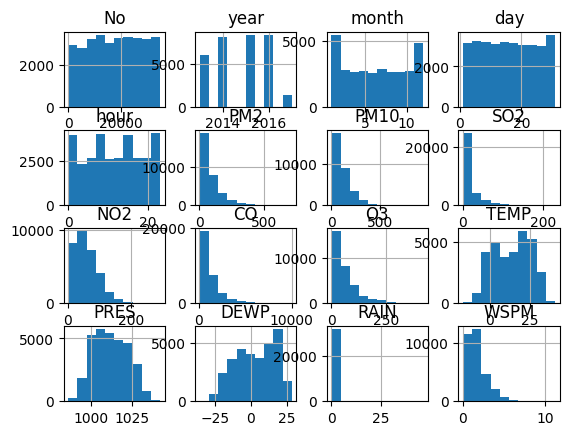

In [19]:
dataku.hist()

In [20]:
dataku.corr()

<ipython-input-20-778355fc5460>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataku.corr()


,No,year,month,day,hour,PM2,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,0.969426,0.067551,0.026484,0.006155,-0.027866,-0.085685,-0.245131,-0.086058,0.070917,0.063351,-0.116645,0.241082,-0.139133,0.004014,0.097572
year,0.969426,1.000000,-0.178465,0.002849,0.004969,-0.031908,-0.076424,-0.175384,-0.112066,0.058492,0.085586,-0.158463,0.246033,-0.215746,-0.000300,0.135931
month,0.067551,-0.178465,1.000000,0.010692,0.001735,0.016911,-0.035822,-0.270781,0.109088,0.047609,-0.093766,0.177046,-0.037046,0.318998,0.017630,-0.160100
day,0.026484,0.002849,0.010692,1.000000,-0.000207,0.009715,0.033096,-0.023222,0.016110,-0.020095,0.007848,0.031208,0.010470,0.044015,-0.000800,-0.021669
hour,0.006155,0.004969,0.001735,-0.000207,1.000000,-0.010580,0.020580,0.001181,-0.045403,-0.045401,0.296388,0.139401,-0.038339,-0.013471,0.012211,0.150500
PM2,-0.027866,-0.031908,0.016911,0.009715,-0.010580,1.000000,0.878741,0.489449,0.686048,0.786252,-0.166250,-0.125711,-0.008697,0.125706,-0.020498,-0.286331
PM10,-0.085685,-0.076424,-0.035822,0.033096,0.020580,0.878741,1.000000,0.479850,0.653409,0.682088,-0.146959,-0.110371,-0.034957,0.063988,-0.032775,-0.188684
SO2,-0.245131,-0.175384,-0.270781,-0.023222,0.001181,0.489449,0.479850,1.000000,0.437707,0.539348,-0.202866,-0.353431,0.204208,-0.282847,-0.044462,-0.113536
NO2,-0.086058,-0.112066,0.109088,0.016110,-0.045403,0.686048,0.653409,0.437707,1.000000,0.690435,-0.507433,-0.244404,0.085013,0.064514,-0.043205,-0.494955
CO,0.070917,0.058492,0.047609,-0.020095,-0.045401,0.786252,0.682088,0.539348,0.690435,1.000000,-0.326466,-0.364495,0.214581,-0.096809,-0.017992,-0.283877


### Pertanyaan 1:

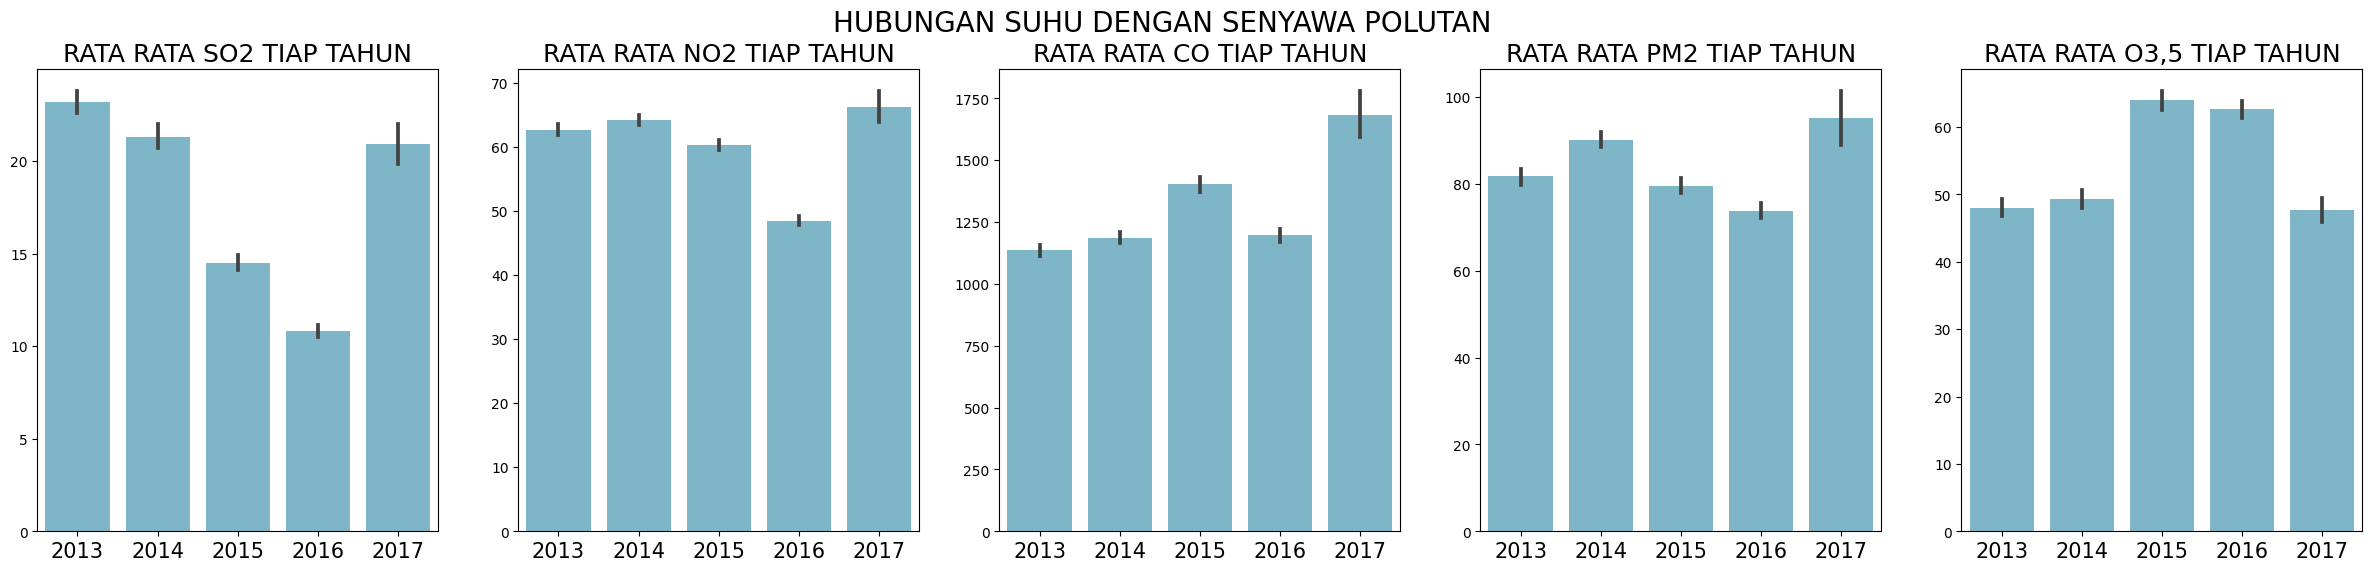

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="SO2", x="year", data=dataku.sort_values(by="SO2", ascending=True), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("RATA RATA SO2 TIAP TAHUN", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="NO2", x="year", data=dataku.sort_values(by="NO2", ascending=True), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("RATA RATA NO2 TIAP TAHUN", loc="center", fontsize=18)
ax[1].tick_params(axis ='x', labelsize=15)

sns.barplot(y="CO", x="year", data=dataku.sort_values(by="CO", ascending=True), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("RATA RATA CO TIAP TAHUN", loc="center", fontsize=18)
ax[2].tick_params(axis ='x', labelsize=15)

sns.barplot(y="PM2", x="year", data=dataku.sort_values(by="PM2", ascending=True), palette=colors, ax=ax[3])
ax[3].set_ylabel(None)
ax[3].set_xlabel(None)
ax[3].set_title("RATA RATA PM2 TIAP TAHUN", loc="center", fontsize=18)
ax[3].tick_params(axis ='x', labelsize=15)

sns.barplot(y="O3", x="year", data=dataku.sort_values(by="O3", ascending=True), palette=colors, ax=ax[4])
ax[4].set_ylabel(None)
ax[4].set_xlabel(None)
ax[4].set_title("RATA RATA O3,5 TIAP TAHUN", loc="center", fontsize=18)
ax[4].tick_params(axis ='x', labelsize=15)

plt.suptitle("HUBUNGAN SUHU DENGAN SENYAWA POLUTAN", fontsize=20)
plt.show()


### Pertanyaan 2:

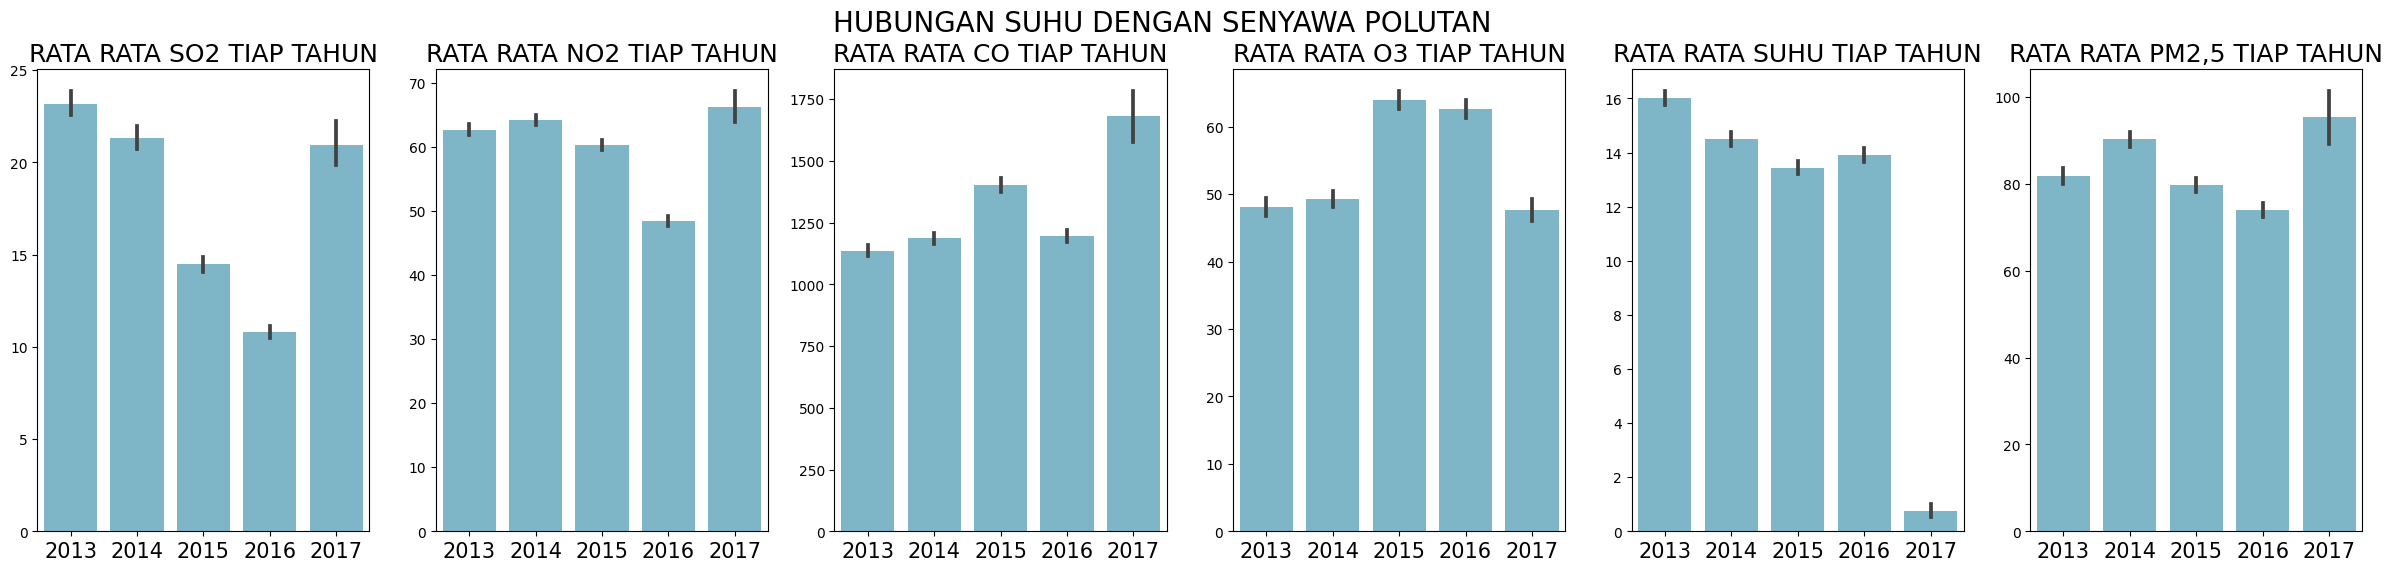

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="SO2", x="year", data=dataku.sort_values(by="SO2", ascending=True), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("RATA RATA SO2 TIAP TAHUN", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="NO2", x="year", data=dataku.sort_values(by="NO2", ascending=True), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("RATA RATA NO2 TIAP TAHUN", loc="center", fontsize=18)
ax[1].tick_params(axis ='x', labelsize=15)

sns.barplot(y="CO", x="year", data=dataku.sort_values(by="CO", ascending=True), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("RATA RATA CO TIAP TAHUN", loc="center", fontsize=18)
ax[2].tick_params(axis ='x', labelsize=15)

sns.barplot(y="O3", x="year", data=dataku.sort_values(by="O3", ascending=True), palette=colors, ax=ax[3])
ax[3].set_ylabel(None)
ax[3].set_xlabel(None)
ax[3].set_title("RATA RATA O3 TIAP TAHUN", loc="center", fontsize=18)
ax[3].tick_params(axis ='x', labelsize=15)


sns.barplot(y="TEMP", x="year", data=dataku.sort_values(by="TEMP", ascending=True), palette=colors, ax=ax[4])
ax[4].set_ylabel(None)
ax[4].set_xlabel(None)
ax[4].set_title("RATA RATA SUHU TIAP TAHUN", loc="center", fontsize=18)
ax[4].tick_params(axis ='x', labelsize=15)

sns.barplot(y="PM2", x="year", data=dataku.sort_values(by="PM2", ascending=True), palette=colors, ax=ax[5])
ax[5].set_ylabel(None)
ax[5].set_xlabel(None)
ax[5].set_title("RATA RATA PM2,5 TIAP TAHUN", loc="center", fontsize=18)
ax[5].tick_params(axis ='x', labelsize=15)

plt.suptitle("HUBUNGAN SUHU DENGAN SENYAWA POLUTAN", fontsize=20)
plt.show()


In [23]:
suhu_tiapbulan = dataku.groupby("month")["TEMP"].mean()

<BarContainer object of 12 artists>

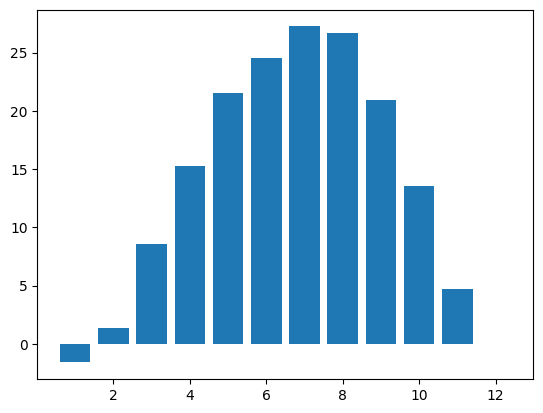

In [24]:
plt.bar(suhu_tiapbulan.index, suhu_tiapbulan.values)

In [25]:
data_pivot = dataku.pivot_table(index='month', columns='year', values='TEMP')

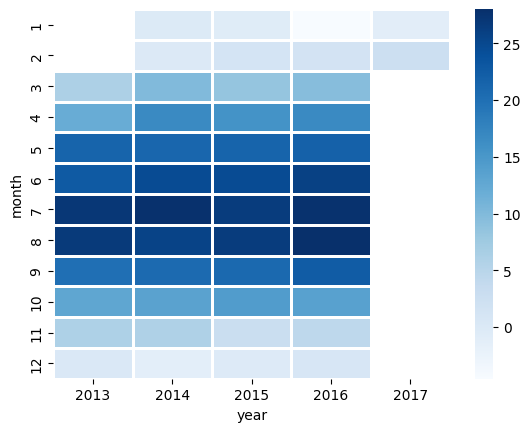

In [26]:
sns.heatmap(data_pivot, cmap='Blues', linecolor='White', linewidths=1);


## Conclusion

- Conclution pertanyaan 1
tahun dengan kondisi terbaik adalah pada tahun 2016 karena pada tahun ini kandungan SO2,NO2,CO,PM2.5 TERENDAH DARI TAHUN 2013 SAMPAI 2017
- conclution pertanyaan 2
suhu tidak ada hubungan dengan senyawa poliutan namun seteh di lihat dari suhu tap bulan suhu tertinggi terdapat pada bulan ke 7 dan 8 yang merupakan musim panas di china sehingga musim lah yang mempunyai pengaruh terhadap suhu udara di sana

In [27]:
dataku.to_csv("dataku.csv", index=False)